# Big Mart Sales Prediction - Anlytics Vidhya Hackathon_01

## Problem statement:

### Sales Prediction for Big Mart Outlets:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### Data Dictionary:

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Train file: CSV containing the item outlet information with sales value

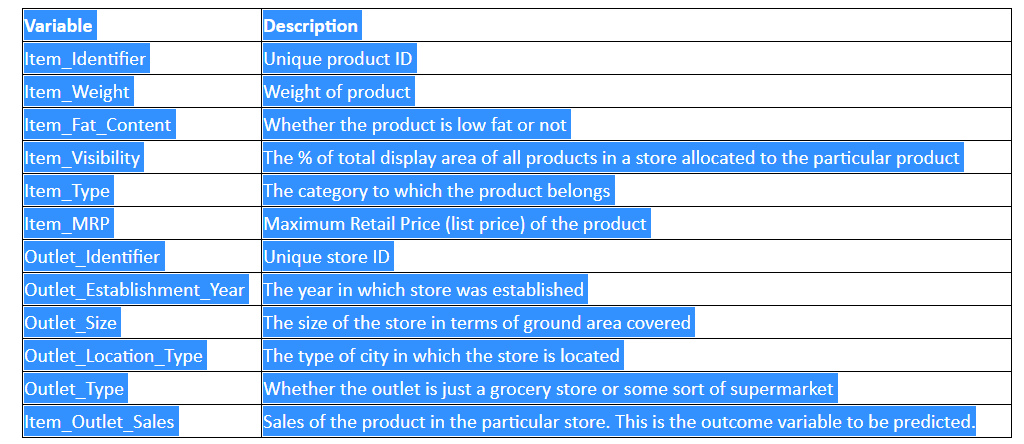

Test file: CSV containing item outlet combinations for which sales need to be forecasted:

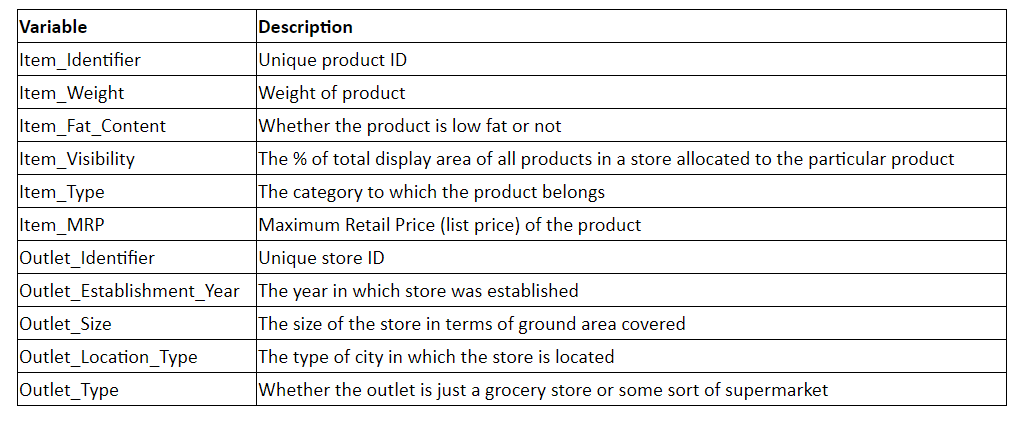

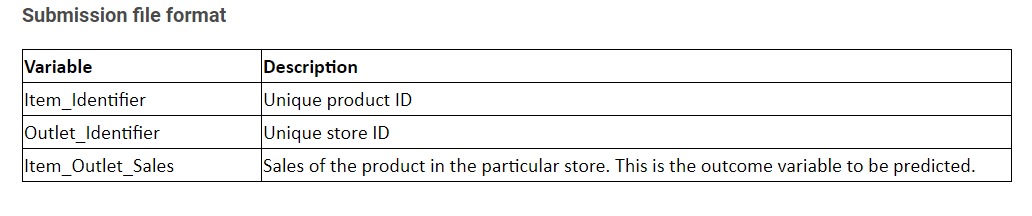

### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

### Public and Private Split:

Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.


### Guidelines for Final Submission:

Please ensure that your final submission includes the following:

Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission

## Import Required Packages:

In [372]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [373]:
os.chdir('D:/Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction')


In [374]:
pwd

'D:\\Studies\\Data_science\\Data_Science_comptetetion\\analytics_Vidhya\\Big Mart Sales Prediction'

### Import data from train and test data set:

In [375]:
train= pd.read_csv('Dataset/train_v9rqX0R.csv')
test=pd.read_csv('Dataset/test_AbJTz2l.csv')

## Display Head and tail data of train and test data using functions:

In [376]:
def display_head_tail(data, head_rows, tail_rows):
    
    print("### Data Head : ###")
    display(data.head(head_rows))
    print("")
    print("### Data Tail : ###")
    display(data.tail(tail_rows))
    
    return True

In [377]:
# Display Data Head and Tail :
display_head_tail(train, head_rows=5, tail_rows=2)
display_head_tail(test, head_rows=5, tail_rows=2)

### Data Head : ###


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



### Data Tail : ###


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


### Data Head : ###


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3



### Data Tail : ###


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5679,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


True

In [378]:
## the above fuction will perform the same function as mentioned below:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


## Print shape of train and test data:

In [379]:
print("TRAIN : ",train.shape)
print("TEST : ",test.shape)

TRAIN :  (8523, 12)
TEST :  (5681, 11)


In [380]:
display(train.describe)
display(test.describe)

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [382]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Display null value details in the train and test Data:

In [383]:
display(train.isna().sum())
display(test.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In train and test data only Item_Weight and Outlet_Size are having mising values. We need to address it one by one.

####  Before addressing the missing values plot the histogram for both train and test data and it will be helpful for comparission 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE339DA5C8>,
      dtype=object)

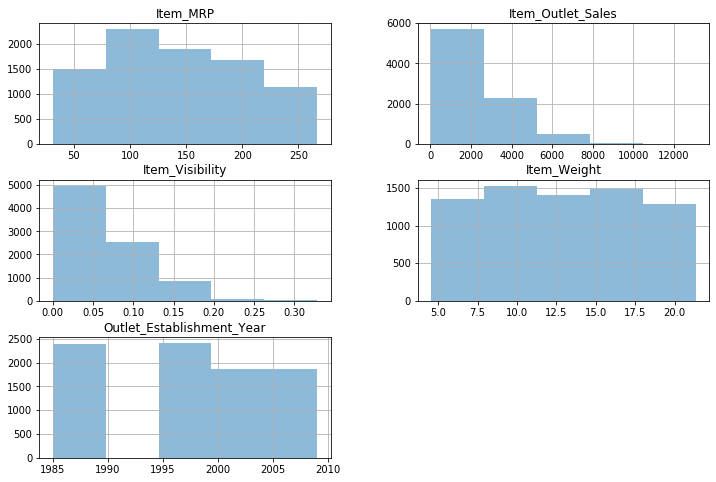

In [384]:
train.hist(bins=5, alpha=0.5,figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE4A078E88>,
      dtype=object)

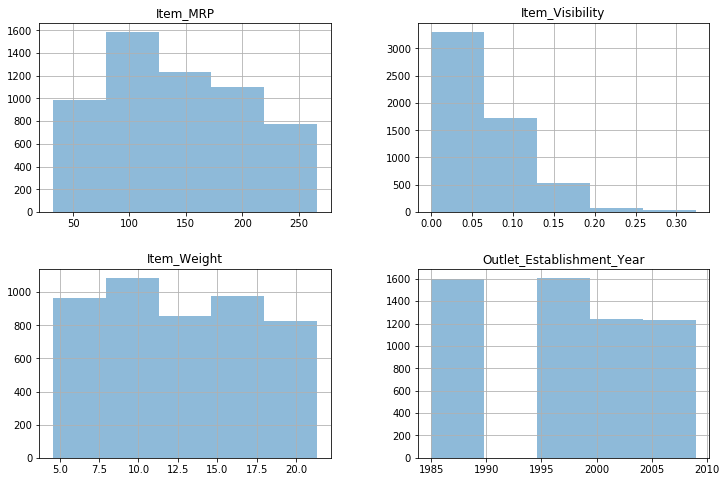

In [385]:
test.hist(bins=5, alpha=0.5,figsize=(12,8))

## Addressing Missing values:

In [386]:
display(train.Outlet_Size.value_counts())
display(test.Outlet_Size.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [387]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [388]:
display(train.isna().sum())
display(test.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [389]:
display(train.Outlet_Size.value_counts())
display(test.Outlet_Size.value_counts())

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [390]:
## Forward fill for Item_weight:

train["Item_Weight"] = train["Item_Weight"].ffill(axis = 0)
test["Item_Weight"] = test["Item_Weight"].ffill(axis = 0)

In [391]:
display(train.isna().sum())
display(test.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [392]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We have removed the null values using mode function and forward fill

## Remove Item identifier and outlet identifier feature from both train and test Data:

In [393]:
train.drop(['Item_Identifier'],axis=1, inplace=True)
test.drop(['Item_Identifier'],axis=1, inplace=True)

In [394]:
train.drop(['Outlet_Identifier'],axis=1, inplace=True)
test.drop(['Outlet_Identifier'],axis=1, inplace=True)

## convert category into binary dummy variable:

Item_Fat_Content - One hot encoding


### One hot encoding for Item_Fat_Content:

In [395]:
 train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [396]:
train_Item_Fat_Content = pd.get_dummies(train['Item_Fat_Content'], prefix = 'Fat_Content')
train = pd.concat([train,train_Item_Fat_Content],axis=1)
train.drop(['Item_Fat_Content'],axis=1, inplace=True)

In [397]:
test_Item_Fat_Content = pd.get_dummies(test['Item_Fat_Content'], prefix = 'Fat_Content')
test = pd.concat([test,test_Item_Fat_Content],axis=1)
test.drop(['Item_Fat_Content'],axis=1, inplace=True)

### One hot encoding for Outlet_Size:

In [398]:
## train outlook size:
train_Outlet_Size = pd.get_dummies(train['Outlet_Size'], prefix = 'Outlet_Size')
train = pd.concat([train,train_Outlet_Size],axis=1)
train.drop(['Outlet_Size'],axis=1, inplace=True)

## test outlook size:
test_Outlet_Size = pd.get_dummies(test['Outlet_Size'], prefix = 'Outlet_Size')
test = pd.concat([test,test_Outlet_Size],axis=1)
test.drop(['Outlet_Size'],axis=1, inplace=True)

### Label encoding for Item_type:

In [399]:
 train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [400]:
train['Item_Type']= label_encoder.fit_transform(train['Item_Type']) 
test['Item_Type']= label_encoder.fit_transform(test['Item_Type']) 

### One hot encoding for Outlet_Size:

In [401]:
 train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [402]:
## train Outlet_Location_Type:
train_Outlet_Location_Type = pd.get_dummies(train['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
train = pd.concat([train,train_Outlet_Location_Type],axis=1)
train.drop(['Outlet_Location_Type'],axis=1, inplace=True)

## test Outlet_Location_Type:
test_Outlet_Location_Type = pd.get_dummies(test['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
test = pd.concat([test,test_Outlet_Location_Type],axis=1)
test.drop(['Outlet_Location_Type'],axis=1, inplace=True)

### One hot encoding for Outlet_Type:

In [403]:
 train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [404]:
## train Outlet_Type:
train_Outlet_Type = pd.get_dummies(train['Outlet_Type'], prefix = 'Outlet_Type')
train = pd.concat([train,train_Outlet_Type],axis=1)
train.drop(['Outlet_Type'],axis=1, inplace=True)

## test Outlet_Type:
test_Outlet_Type = pd.get_dummies(test['Outlet_Type'], prefix = 'Outlet_Type')
test = pd.concat([test,test_Outlet_Type],axis=1)
test.drop(['Outlet_Type'],axis=1, inplace=True)

In [405]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Fat_Content_LF,Fat_Content_Low Fat,Fat_Content_Regular,Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,1999,3735.1380,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,2009,443.4228,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,10,141.6180,1999,2097.2700,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,1998,732.3800,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,9,53.8614,1987,994.7052,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [406]:
test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Fat_Content_LF,Fat_Content_Low Fat,Fat_Content_Regular,Fat_Content_low fat,Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,13,107.8622,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,4,87.3198,2007,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,11,241.7538,1998,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,13,155.0340,2007,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
4,7.315,0.118599,4,234.2300,1985,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,13,141.3154,1997,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0
5677,7.600,0.142991,15,169.1448,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
5678,10.000,0.073529,8,118.7440,2002,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5679,15.300,0.000000,3,214.6218,2007,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


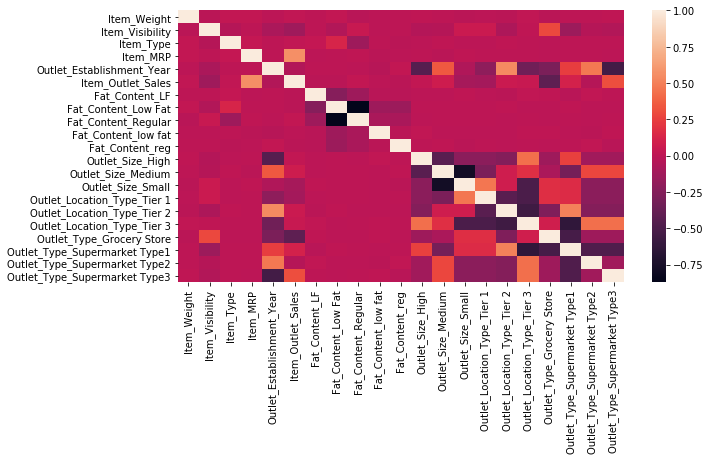

In [407]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr())

In [408]:
train_target = train['Item_Outlet_Sales']


### Drop Item_Outlet_Sales in train_input:

In [409]:
train_input=train.drop('Item_Outlet_Sales',axis=1)


### Feature Selection:


url followed Univariate Selection:
    https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
        

In [410]:
train_input=train_input.astype(int)
train_target=train_target.astype(int)
test=test.astype(int)

In [411]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Item_Weight                    8523 non-null   int32
 1   Item_Visibility                8523 non-null   int32
 2   Item_Type                      8523 non-null   int32
 3   Item_MRP                       8523 non-null   int32
 4   Outlet_Establishment_Year      8523 non-null   int32
 5   Fat_Content_LF                 8523 non-null   int32
 6   Fat_Content_Low Fat            8523 non-null   int32
 7   Fat_Content_Regular            8523 non-null   int32
 8   Fat_Content_low fat            8523 non-null   int32
 9   Fat_Content_reg                8523 non-null   int32
 10  Outlet_Size_High               8523 non-null   int32
 11  Outlet_Size_Medium             8523 non-null   int32
 12  Outlet_Size_Small              8523 non-null   int32
 13  Outlet_Location_Ty

In [412]:
train_input

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Fat_Content_LF,Fat_Content_Low Fat,Fat_Content_Regular,Fat_Content_low fat,Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,4,249,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5,0,14,48,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17,0,10,141,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19,0,6,182,1998,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,8,0,9,53,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6,0,13,214,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,8,0,0,108,2002,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8520,10,0,8,85,2004,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7,0,13,103,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [413]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
train_target
train_input


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Fat_Content_LF,Fat_Content_Low Fat,Fat_Content_Regular,Fat_Content_low fat,Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,4,249,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5,0,14,48,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17,0,10,141,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19,0,6,182,1998,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,8,0,9,53,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6,0,13,214,1987,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
8519,8,0,0,108,2002,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8520,10,0,8,85,2004,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,7,0,13,103,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


In [414]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(train_input,train_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_input.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                            Specs          Score
3                        Item_MRP  155612.110942
2                       Item_Type    8560.004638
0                     Item_Weight    5677.863459
16      Outlet_Type_Grocery Store    5337.449145
19  Outlet_Type_Supermarket Type3    3923.261372
8             Fat_Content_low fat    3123.149514
5                  Fat_Content_LF    2834.093937
9                 Fat_Content_reg    2815.965873
10               Outlet_Size_High    2785.709977
18  Outlet_Type_Supermarket Type2    2616.835211
13    Outlet_Location_Type_Tier 1    2288.506128
14    Outlet_Location_Type_Tier 2    2265.608036
12              Outlet_Size_Small    2246.302235
7             Fat_Content_Regular    2220.957169
15    Outlet_Location_Type_Tier 3    1963.546577
17  Outlet_Type_Supermarket Type1    1454.051050
6             Fat_Content_Low Fat    1336.976072
11             Outlet_Size_Medium    1206.671065
4       Outlet_Establishment_Year     125.587194


## Drop Outlet establishment year from both train and test data:

In [415]:
train_input=train_input.drop('Outlet_Establishment_Year',axis=1)

In [416]:
test=test.drop('Outlet_Establishment_Year',axis=1)

In [417]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Item_Weight                    8523 non-null   int32
 1   Item_Visibility                8523 non-null   int32
 2   Item_Type                      8523 non-null   int32
 3   Item_MRP                       8523 non-null   int32
 4   Fat_Content_LF                 8523 non-null   int32
 5   Fat_Content_Low Fat            8523 non-null   int32
 6   Fat_Content_Regular            8523 non-null   int32
 7   Fat_Content_low fat            8523 non-null   int32
 8   Fat_Content_reg                8523 non-null   int32
 9   Outlet_Size_High               8523 non-null   int32
 10  Outlet_Size_Medium             8523 non-null   int32
 11  Outlet_Size_Small              8523 non-null   int32
 12  Outlet_Location_Type_Tier 1    8523 non-null   int32
 13  Outlet_Location_Ty

In [418]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Item_Weight                    5681 non-null   int32
 1   Item_Visibility                5681 non-null   int32
 2   Item_Type                      5681 non-null   int32
 3   Item_MRP                       5681 non-null   int32
 4   Fat_Content_LF                 5681 non-null   int32
 5   Fat_Content_Low Fat            5681 non-null   int32
 6   Fat_Content_Regular            5681 non-null   int32
 7   Fat_Content_low fat            5681 non-null   int32
 8   Fat_Content_reg                5681 non-null   int32
 9   Outlet_Size_High               5681 non-null   int32
 10  Outlet_Size_Medium             5681 non-null   int32
 11  Outlet_Size_Small              5681 non-null   int32
 12  Outlet_Location_Type_Tier 1    5681 non-null   int32
 13  Outlet_Location_Ty

## Outlet establishment year is not an important feature we will remove it 

### Stanadard Scaler:

It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [419]:
#from sklearn import preprocessing
#standardscaler=preprocessing.StandardScaler()
#train_scale=standardscaler.fit_transform(train_input)
#test_scale=standardscaler.fit_transform(test)
#print(train_scale)
#print(test_scale)

In [420]:
from sklearn import preprocessing
#scaler = preprocessing.RobustScaler()
scaler = preprocessing.MinMaxScaler()
train_scale=scaler.fit_transform(train_input)
test_scale=scaler.fit_transform(test)
print(train_scale)
print(test_scale)

[[0.29411765 0.         0.26666667 ... 1.         0.         0.        ]
 [0.05882353 0.         0.93333333 ... 0.         1.         0.        ]
 [0.76470588 0.         0.66666667 ... 1.         0.         0.        ]
 ...
 [0.35294118 0.         0.53333333 ... 1.         0.         0.        ]
 [0.17647059 0.         0.86666667 ... 0.         1.         0.        ]
 [0.58823529 0.         0.93333333 ... 1.         0.         0.        ]]
[[0.94117647 0.         0.86666667 ... 1.         0.         0.        ]
 [0.23529412 0.         0.26666667 ... 1.         0.         0.        ]
 [0.58823529 0.         0.73333333 ... 0.         0.         0.        ]
 ...
 [0.35294118 0.         0.53333333 ... 1.         0.         0.        ]
 [0.64705882 0.         0.2        ... 1.         0.         0.        ]
 [0.29411765 0.         0.2        ... 1.         0.         0.        ]]


## train and test split:

In [421]:
train_target.head(3)

0    3735
1     443
2    2097
Name: Item_Outlet_Sales, dtype: int32

In [422]:
x_train,x_test,y_train,y_test=train_test_split(train_scale,train_target,test_size=0.2,random_state=0)

In [423]:
x_train

array([[0.23529412, 0.        , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.82352941, 0.        , 0.93333333, ..., 1.        , 0.        ,
        0.        ],
       [0.64705882, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.52941176, 0.        , 0.86666667, ..., 1.        , 0.        ,
        0.        ],
       [0.82352941, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.58823529, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

## Apply Machine Leraning Model:

## Linear Regression

url:

https://medium.com/@hpriya206/sales-prediction-using-python-for-machine-learning-6a76e4d63e71

In [424]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


In [425]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predictions))
print(rms)

1130.883449598202


In [426]:
## Prediction for test data:

y_pred = predictions = lm.predict(test_scale)


In [427]:
test01=pd.read_csv('Dataset/test_AbJTz2l.csv')

In [428]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/linear_regression_result01.csv")

## The results are in negative values

### KNN Regression:

https://medium.com/@hpriya206/sales-prediction-using-python-for-machine-learning-6a76e4d63e71

In [429]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

In [430]:
KNN_model=KNeighborsRegressor(n_neighbors=5)

In [431]:
KNN_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [432]:
knn_predict=KNN_model.predict(x_test)

In [433]:
knn_predict

array([3030.4, 1342.4, 2543.8, ..., 3061.8,  139. , 5743.2])

In [434]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, knn_predict))
print(rms)

1180.7946874209936


### KNN regression for test_scale data:

In [435]:
knn_predict=KNN_model.predict(test_scale)

### print the result to a output file:

In [436]:
result01 = pd.DataFrame(knn_predict)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/knn_regression_result01.csv")

### RandomForestRegressor:

In [437]:
from sklearn.ensemble import RandomForestRegressor

In [438]:
clf = RandomForestRegressor(n_estimators=10)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [439]:
y_test

4931    1426
4148    1201
7423    1836
4836    2410
944     1549
        ... 
4644    3235
6179     555
1861    2885
3598     218
1523    5478
Name: Item_Outlet_Sales, Length: 1705, dtype: int32

In [440]:
y_pred

array([2233.8, 1740.4, 1635.8, ..., 4783.1,  233.4, 6262.6])

In [441]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1227.2127524744255


In [442]:
## Prediction for test data:

y_pred = clf.predict(test_scale)

In [443]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/randomforest_regression_result01.csv")

### Support Vector Machine:

In [444]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [445]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [446]:
# Print support vector regressor model predictions:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[2514.1194634  1999.64167544 2019.37151851 ... 4161.38279003   90.76993385
 5467.05170191]


In [447]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, svm_prediction))
print(rms)

1091.2891951992094


In [448]:
## Prediction for test data:


svm_prediction = svr_rbf.predict(test_scale)

In [449]:
result01 = pd.DataFrame(svm_prediction)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/svm_regression_result01.csv")

### XGBoost Regression:

links:
    https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [450]:
import xgboost as xgb

In [451]:
xgb_regression = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [452]:
xgb_regression.fit(x_train, y_train)
y_pred = xgb_regression.predict(x_test)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1118.585316862585


In [453]:
## Prediction for test data:
y_pred = xgb_regression.predict(test_scale)

In [454]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/xgboost_regression_result01.csv")

## for xgboost few negative values are coming and we need to avoid it

### Gradient Boosting Machine for Regression:

link:
https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

In [455]:
from sklearn.ensemble import GradientBoostingRegressor

In [456]:
# evaluate the model
model = GradientBoostingRegressor()

In [457]:
# fit the model on the whole dataset
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [458]:
y_pred = model.predict(x_test)

In [459]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1091.5766389381229


In [492]:
## Prediction for test data:

y_pred = model.predict(test_scale)

In [493]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/GradientBoostingRegressor_result01.csv")

## Grid Search Hyperparameter tuning:

url followed:
    https://educationalresearchtechniques.com/2019/01/14/gradient-boosting-regression-in-python/

In [482]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [484]:
search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

In [485]:
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500,
 'random_state': 1,
 'subsample': 0.5}

In [486]:
search.best_score_

-1165482.46017705

In [500]:
# fit the model on the whole dataset
model = GradientBoostingRegressor(learning_rate=0.01,max_depth=2,n_estimators=500,random_state=1,subsample=0.5)
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [501]:
y_pred = model.predict(x_test)

In [502]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1088.502158558718


In [503]:
## Prediction for test data:

y_pred = model.predict(test_scale)

In [505]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/GradientBoostingRegressor_result03.csv")

### Histogram-Based Gradient Boosting Machine for Regression:

In [462]:
 	
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [463]:
# evaluate the model
model = HistGradientBoostingRegressor()
# fit the model on the whole dataset
model = HistGradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [464]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1123.3496476919765


In [465]:
## Prediction for test data:

y_pred = model.predict(test_scale)

In [466]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/Histogram_GradientBoostingRegressor_result01.csv")

### Gradient Boosting With LightGBM:

In [467]:
from lightgbm import LGBMRegressor

In [468]:
# evaluate the model
model = LGBMRegressor()
# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [469]:
rms = sqrt(mean_squared_error(y_test,y_pred))
print(rms)

1122.9092024237066


In [470]:
## Prediction for test data:

y_pred = model.predict(test_scale)

In [471]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/LightGBM_GradientBoostingRegressor_result01.csv")

### Gradient Boosting with CatBoost:

In [472]:
from catboost import CatBoostRegressor

In [473]:

# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=200)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [474]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

1126.9711574252794


In [475]:
## Prediction for test data:

y_pred = model.predict(test_scale)

In [476]:
result01 = pd.DataFrame(y_pred)
result01['Item_Identifier']=test01['Item_Identifier']
result01['Outlet_Identifier']=test01['Outlet_Identifier']
column_names=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier']
df1 = pd.DataFrame(result01.values, columns = column_names )
df1 = df1[["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]]
df1.index=df1['Item_Identifier']
df2=df1.drop(columns=['Item_Identifier'])
df2.to_csv("D:\Studies/Data_science/Data_Science_comptetetion/analytics_Vidhya/Big Mart Sales Prediction/Output/output02/catboost_GradientBoostingRegressor_result01.csv")

## few negative values are there , need to tune on it

https://github.com/karinsasaki/Big-Mart-Sales/blob/master/Big%20Mart%20Sales%20prediction_final.ipynb